In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import networkx as nx
from pprint import pprint as ppr

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def dist(v,u):
    return ((v[0]-u[0])**2 + (v[1]-u[1])**2)**0.5

import math

def around(n):
    if n - math.floor(n) < 0.6:
        return math.floor(n)
    return math.ceil(n)

In [ ]:

fig=plt.figure(figsize=(8, 4))

# make up some data for demo purposes
raw = np.random.randint(10, size=(6,6))
# apply some logic operatioin to the data
O = (raw >= 5) * 1   # get either 0 or 1 in the array
I = np.random.randint(10, size=(6,6))  # get 0-9 in the array

# plot each image ...
# ... side by side
fig.add_subplot(1, 2, 1)   # subplot one
plt.imshow(I, cmap=plt.cm.gray)

fig.add_subplot(1, 2, 2)   # subplot two
# my data is OK to use gray colormap (0:black, 1:white)
plt.imshow(O, cmap=plt.cm.gray)  # use appropriate colormap here
plt.show()

In [12]:
%matplotlib inline

build map


[29  8] [25  8] 28.0 8.0
build map


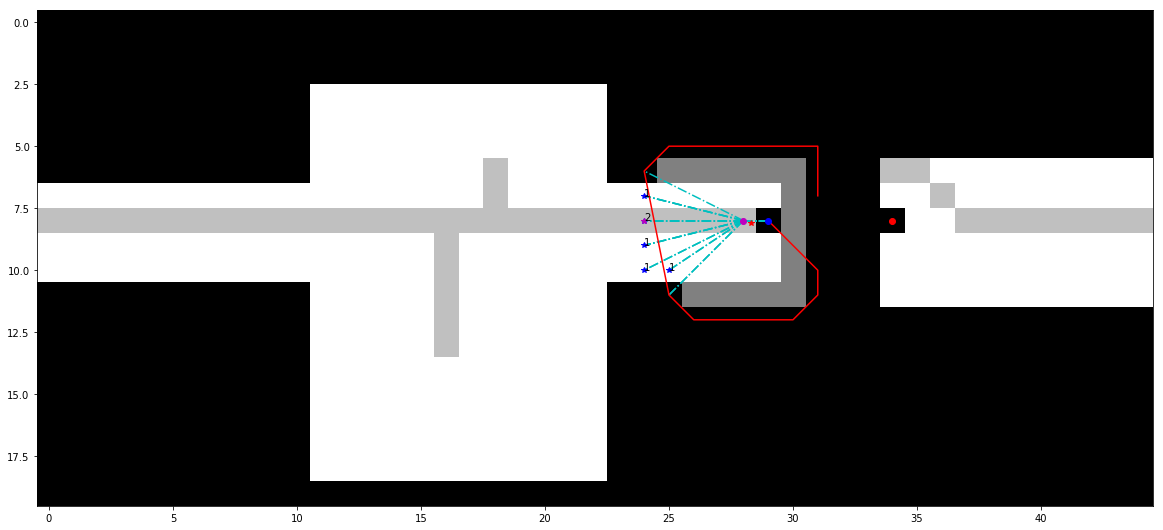

[28.  8.] [24  8] 27.0 8.0
build map


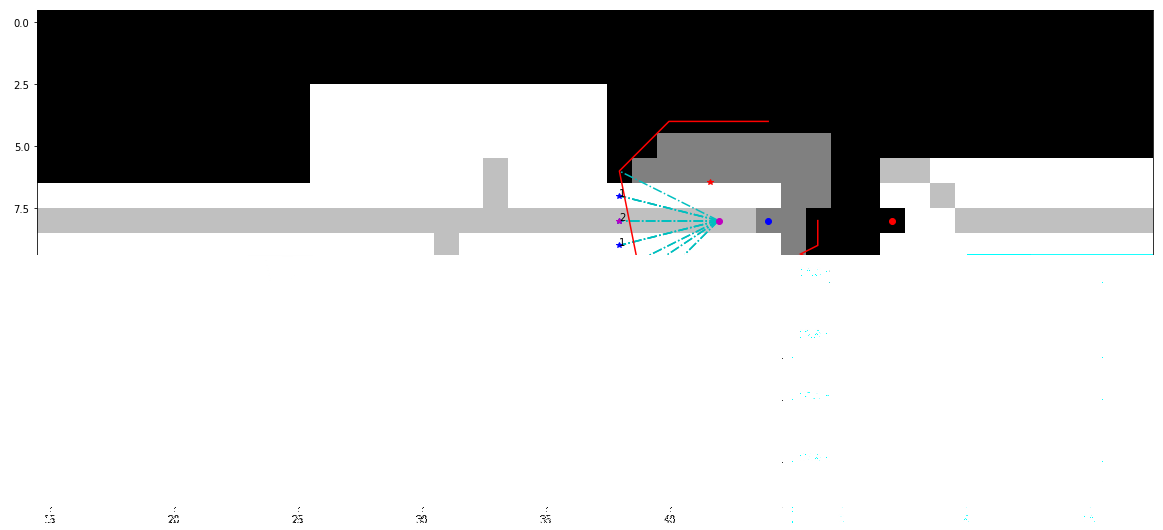

[27.  8.] [23  8] 26.0 8.0
build map


[26.  8.] [22  8] 25.0 8.0
build map


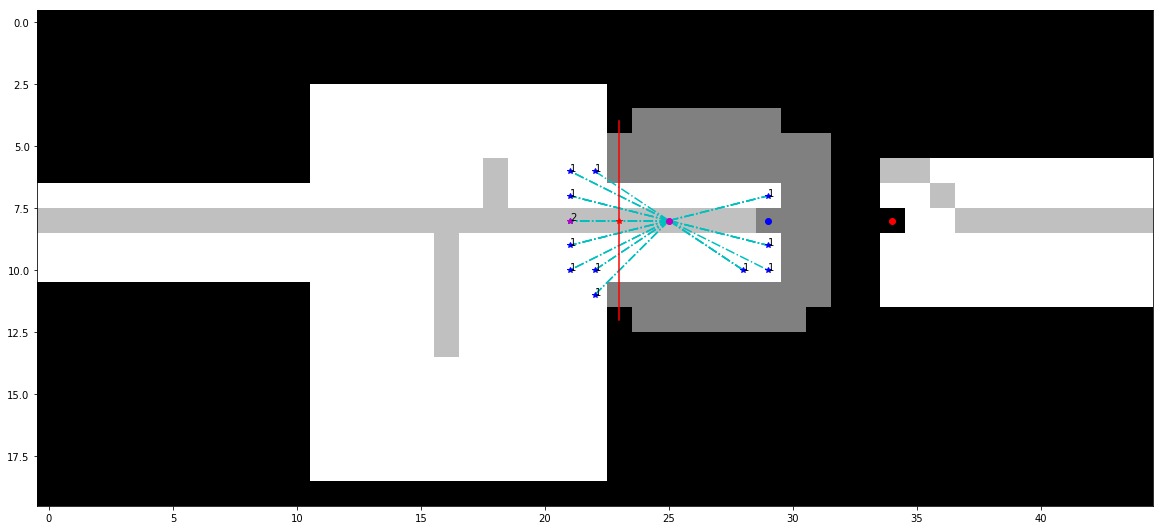

[25.  8.] [21  8] 24.0 8.0
build map


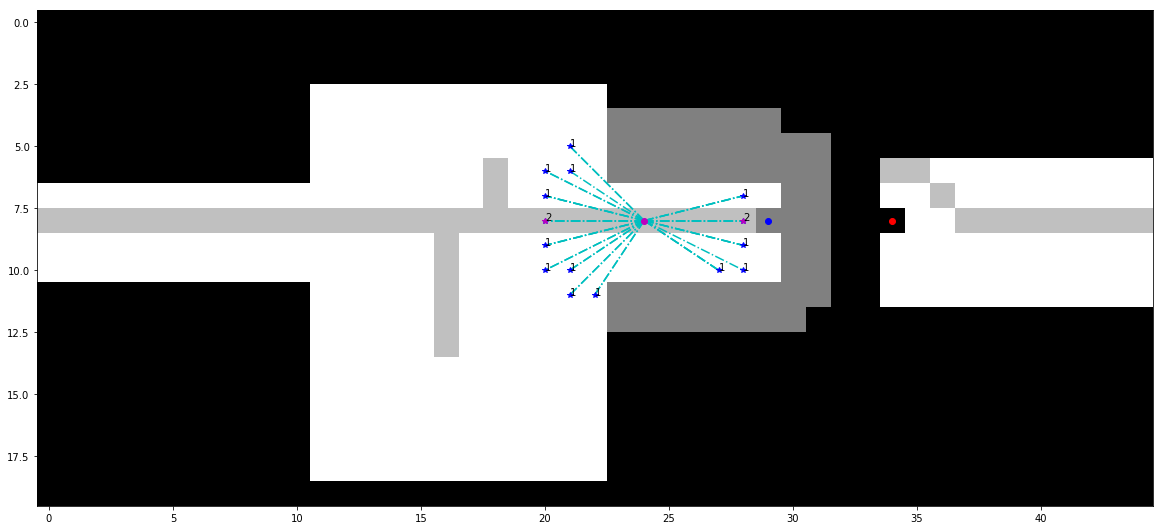

[24.  8.] [28  8] 25.0 8.0
build map


[25.  8.] [21  8] 24.0 8.0
build map


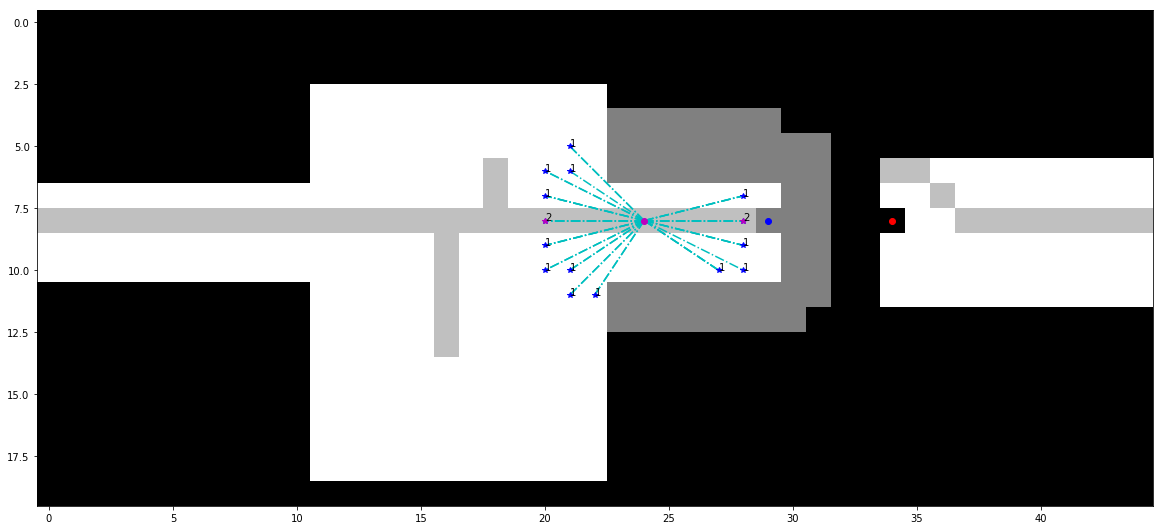

[24.  8.] [28  8] 25.0 8.0
build map


[25.  8.] [21  8] 24.0 8.0
build map


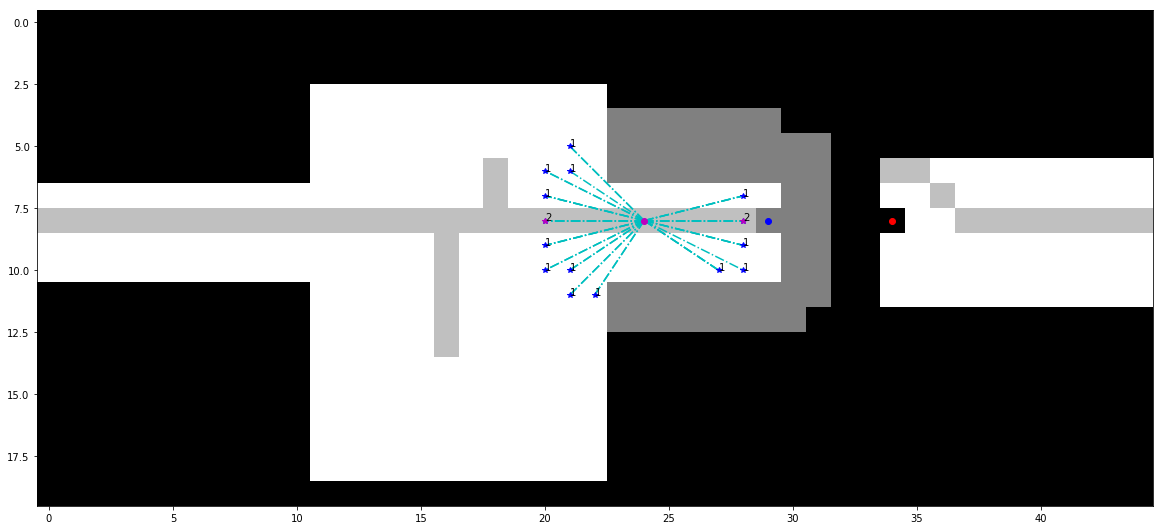

[24.  8.] [28  8] 25.0 8.0
build map


[25.  8.] [21  8] 24.0 8.0
build map


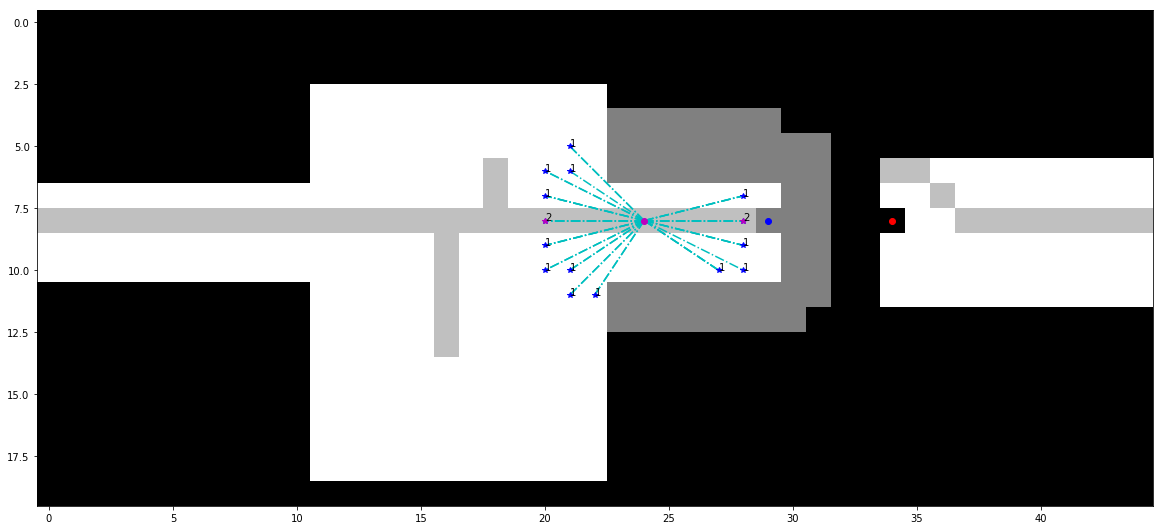

[24.  8.] [28  8] 25.0 8.0
build map


[25.  8.] [21  8] 24.0 8.0
build map


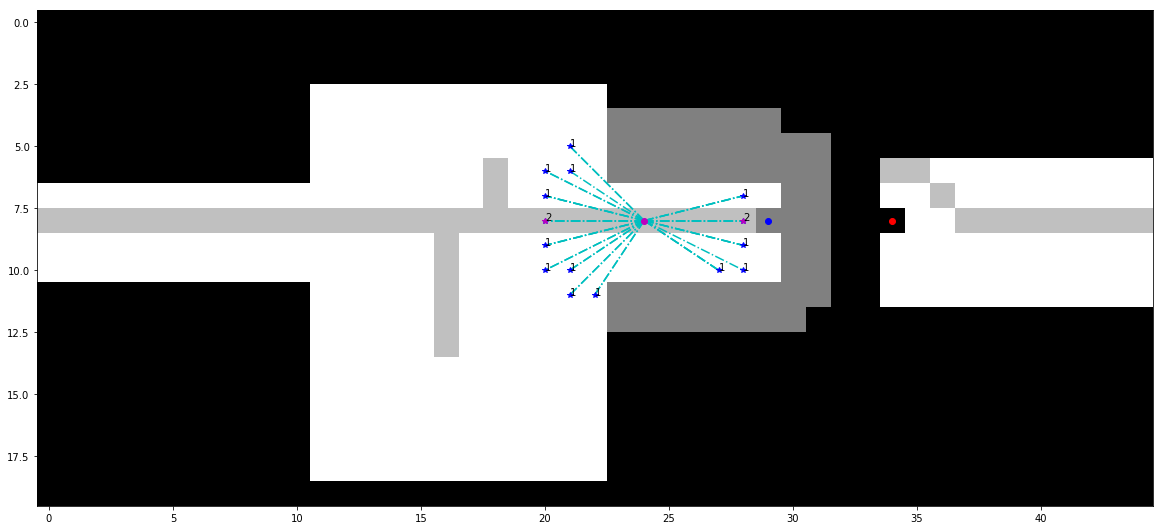

[24.  8.] [28  8] 25.0 8.0
build map


[25.  8.] [21  8] 24.0 8.0


In [64]:
I = np.loadtxt("waydata.csv",dtype=int).reshape([100,100],order='F')
M = np.loadtxt("midpoints.csv",dtype=int,delimiter=',')
S = np.loadtxt("skeleton.csv",dtype=int).reshape([100,100],order='F')




def lidar(p, I1, minAngle = 0, maxAngle=72, angle=5,maxview=5):
    
    beam = np.c_[p,[p[0],p[1]+5]].T
    steps = np.arange(1,maxview,1)
    cango = []
    weights = []
    border = []
    
    for i in np.arange(0,72):
        theta = math.radians(angle*i)
        doMap = False
        inMap = False
        x1 = p[0]
        x2 = p[1]
        for k in range(len(steps)):
            s = steps[k]

            x1 = s*np.cos(theta) + p[0]
            x2 = s*np.sin(theta) + p[1]

            x1 = int(around(x1))
            x2 = int(around(x2))
            
            I1i = I1[x2,x1]

            if (I1i == 2):
                inMap = True
                doMap = False
            elif (I1i == 0): 
                u = [x1,x2]
                if u not in border:
                    border.append([x1,x2])
                    weights.append(0)
                doMap = True
                break
            
        if doMap == False and inMap == False:
            u = [x1,x2]
            if u not in cango:
                cango.append([x1,x2])
                weights.append(1)
        if inMap == False:
            beam = np.c_[p,[x1,x2]].T
            plt.plot(beam[:,0],beam[:,1],'c-.')

    if cango:
        cango = np.c_[cango]
        plt.plot(cango[:,0], cango[:,1],'b*')
    if border:
        border = np.c_[border]
        borderMean = np.mean(border,axis=0)
        plt.plot(borderMean[0],borderMean[1],'r*')
        plt.plot(border[:,0], border[:,1],'r-')
    
    return cango, border, weights


def gps_near_points(p,I1,A):
    for y in range(p[1]-10,p[1]+10):
        for x in range(p[0]-10,p[0]+10):
            if dist(p,np.r_[x,y]) < 6:
                if (I1[y,x] == 1):
                    A[y,x] = 1
                    plt.plot(x,y,'g.')
                    if (y > p[1] and I1[y+1,x]==0):
                        plt.text(x,y,str(x),zorder=2)
                        plt.plot(x,y+1,'c.',zorder=2)

def gps_cango(I1, cango):
    onpath = []
    for c in cango:
        if I1[c[1],c[0]] == 3:
            plt.plot(c[0],c[1],'m*')
            plt.text(c[0],c[1],'2')
            onpath.append(c)
            
        else:  
            plt.text(c[0],c[1],'1')
    return np.c_[onpath]




maxview = 25


A = np.zeros([100,100])

def build_map(A,border):
    print("build map")
    for b in border:
        x,y = b
        A[y,x] = 2

def move_step(b,p):
    bx,by = b
    px,py = p
    bp = p - b
    if bp[0]:
        bx = bx + bp[0]/abs(bp[0])
    if bp[1]:
        by = by + bp[1]/abs(bp[1])
       
    return np.r_[bx,by]

I[I==1]=4
I[S==1]=3

def move(x, y, i):
   
    I1 = I[:20,st:60]
    S1 = S[:20,st:60]

    plt.figure(figsize=(20,17))

    plt.imshow(I1,cmap=plt.cm.gray, animated=True)

    p = np.r_[x,y]
    plt.plot(44-st,8,'bo',zorder=5)
    plt.plot(49-st,8,'ro',zorder=5)

    cango,border,weights = lidar(p,I1,minAngle = 0, maxAngle=72, 5,maxview)
    
    build_map(I1,border)

    onpath = gps_cango(I1,cango)
    
    plt.plot(p[0],p[1],'mo')

    plt.show()
    
    x,y = move_step(p,onpath[0])
    
    get_new_angle(p,x,y)
    
    print(p,onpath[0],x,y)
    
    return x,y

x = 44
y = 8
st = 15
x -= st
for i in range(15):
    x,y = move(x,y,i)

In [ ]:
plt.figure()
I = np.loadtxt("skeleton.csv",dtype=int).reshape([100,100],order='F')
plt.imshow(I,cmap=plt.cm.gray)
plt.show()

In [ ]:
plt.figure()
I = np.loadtxt("midpoints.csv",dtype=int,delimiter=',')
I[:,1]*=-1
plt.plot(I[:,0],I[:,1],'.')
plt.show()



In [ ]:
import warnings
warnings.filterwarnings('ignore')
from pprint import pprint as ppr

In [ ]:
mean = np.mean(I,axis=0)


Y = I - mean

anyLeft = True

Z = Y

i = 0
idx = 0
y= Y[i]
Z = Y[i+1:]
lenZ = len(Z)
lst = []
lst.append(y)

nn = {}
k = 0

while i < 485:
    i+=1
    Z = Z[np.arange(len(Z))!=idx]
    idx = NearestNeighbors(3,radius=1).fit(Z ).kneighbors(y, 1, return_distance=False)[0][0]
    z = Z[idx]
    d = dist(y,z)
    y=z
    lenZ = len(Z)
    lst.append(z)
    
    
V = np.c_[lst]


plt.plot(V[:,0],V[:,1],'o-')

plt.plot(Y[:,0],Y[:,1],'.')
plt.show()




In [ ]:
import numpy as np
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt

# define pts from the question
pts = np.array([[ 6.55525 ,  3.05472 ],
   [ 6.17284 ,  2.802609],
   [ 5.53946 ,  2.649209],
   [ 4.93053 ,  2.444444],
   [ 4.32544 ,  2.318749],
   [ 3.90982 ,  2.2875  ],
   [ 3.51294 ,  2.221875],
   [ 3.09107 ,  2.29375 ],
   [ 2.64013 ,  2.4375  ],
   [ 2.275444,  2.653124],
   [ 2.137945,  3.26562 ],
   [ 2.15982 ,  3.84375 ],
   [ 2.20982 ,  4.31562 ],
   [ 2.334704,  4.87873 ],
   [ 2.314264,  5.5047  ],
   [ 2.311709,  5.9135  ],
   [ 2.29638 ,  6.42961 ],
   [ 2.619374,  6.75021 ],
   [ 3.32448 ,  6.66353 ],
   [ 3.31582 ,  5.68866 ],
   [ 3.35159 ,  5.17255 ],
   [ 3.48482 ,  4.73125 ],
   [ 3.70669 ,  4.51875 ],
   [ 4.23639 ,  4.58968 ],
   [ 4.39592 ,  4.94615 ],
   [ 4.33527 ,  5.33862 ],
   [ 3.95968 ,  5.61967 ],
   [ 3.56366 ,  5.73976 ],
   [ 3.78818 ,  6.55292 ],
   [ 4.27712 ,  6.8283  ],
   [ 4.89532 ,  6.78615 ],
   [ 5.35334 ,  6.72433 ],
   [ 5.71583 ,  6.54449 ],
   [ 6.13452 ,  6.46019 ],
   [ 6.54478 ,  6.26068 ],
   [ 6.7873  ,  5.74615 ],
   [ 6.64086 ,  5.25269 ],
   [ 6.45649 ,  4.86206 ],
   [ 6.41586 ,  4.46519 ],
   [ 5.44711 ,  4.26519 ],
   [ 5.04087 ,  4.10581 ],
   [ 4.70013 ,  3.67405 ],
   [ 4.83482 ,  3.4375  ],
   [ 5.34086 ,  3.43394 ],
   [ 5.76392 ,  3.55156 ],
   [ 6.37056 ,  3.8778  ],
   [ 6.53116 ,  3.47228 ]])

In [ ]:
plt.plot(pts[:,0], pts[:,1], 'r-')
plt.show()

In [ ]:

tck, u = splprep(pts.T, u=None, s=0.0, per=1) 
u_new = np.linspace(u.min(), u.max(), 1000)
x_new, y_new = splev(u_new, tck, der=0)
plt.plot(pts[:,0], pts[:,1], 'ro')
plt.plot(x_new, y_new, 'b--')
plt.show()

In [ ]:
dist, idx = NearestNeighbors(20,radius=1).fit(Y ).kneighbors(Y[0], 10, return_distance=True)

idx = idx[0]

print(dist,idx,Y[0])

nn = Y[idx]
print(nn)

plt.plot(nn[:,0],nn[:,1],'.')
plt.plot(Y[0,0],Y[0,1],'o')
plt.show()

In [ ]:
mean = np.mean(I,axis=0)


Y = I - mean
clf = NearestNeighbors(3,radius=5).fit(Y )

G = clf.kneighbors_graph()

T = nx.from_scipy_sparse_matrix(G)

order = list(nx.dfs_preorder_nodes(T, 0))


x = Y [order,0]
y = Y [order,1]

plt.plot(x, y,'.-')
plt.show()

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(I)
voronoi_plot_2d(vor)
plt.show()

In [ ]:
from skimage.morphology import skeletonize
X, Y = np.ogrid[0:9, 0:9]
ellipse = (1./3 * (X - 4)**2 + (Y - 4)**2 < 3**2).astype(np.uint8)
print(ellipse)
skel = skeletonize(ellipse)
print(skel.astype(np.uint8))


In [ ]:
import numpy as np

def lerp(v, u, i):
    w = v + i * (u - v)
    return int(w)

def dist(x0,x1, y0,y1):
    return int(((x0-x1)**2 + (y0-y1)**2)**0.5)

def generate_line(p1,p2):
    lst = []
    xs = p1[0]
    xe = p2[0]
    ys = p1[1]
    ye = p2[1]
    n = dist(xs,xe,ys,ye)
    for i in range(n+1):
        x = lerp(xs,xe,1./n*i)
        y = lerp(ys,ye,1./n*i)
        lst.append([x,y])
    return np.c_[lst]

def getEquidistantPoints(p1, p2, n):
    lst = [[lerp(p1[0],p2[0],1./n*i), lerp(p1[1],p2[1],1./n*i)] for i in range(n+1)]
    return np.c_[lst]

pts = generate_line((0,0), (-5,5))

import matplotlib.pyplot as plt

plt.plot(pts[:,0],pts[:,1],'.-')
plt.plot([0,0,10,10],[0,10,0,10],'.')
plt.show()



In [ ]:
j=0
for i in range(72):
    j = (j + 1) % 36
    print (i,j )